`Anomaly detection project`



`About the Dataset`

* A real dataset of anonymized credit card transactions made by European cardholders from September 2013

* These transactions are labeled as fraudulent or genuine

* There are 28 features, all of which are numerical, and there are no categorical variables

* These features are not the original features, They are the output of principal component analysis (PCA)

In the real world, fraud often goes undiscovered, and only the fraud that is caught provides any labels for the datasets. Moreover, fraud patterns change over time, so supervised systems that are built using fraud labels fail to adapt to newly emerging patterns. For these reasons (the lack of sufficient labels and the need to adapt to newly emerging patterns of fraud as quickly as possible), unsupervised learning fraud detection systems are in vogue. (Anomaly Detection)

----

* `Imports`

In [1]:
## Major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## sklearn -- preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## sklearn -- metrics 
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score, precision_score, recall_score

## sklearn -- Dimens. Reduction
from sklearn.decomposition import PCA, SparsePCA, KernelPCA, MiniBatchDictionaryLearning, FastICA
from sklearn.random_projection import GaussianRandomProjection

* `Read the dataset`

In [2]:
DATASET_PATH = os.path.join(os.getcwd(), '..' ,'..', 'datasets', 'credit_card.csv')
df_anomaly = pd.read_csv(DATASET_PATH)
df_anomaly.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_anomaly.info()

# The dataset has no missing values
# All features are numerical (features are float64 , target is bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df_anomaly.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df_anomaly['Class'].value_counts()

# The dataset is highly imbalanced

Class
0    284315
1       492
Name: count, dtype: int64

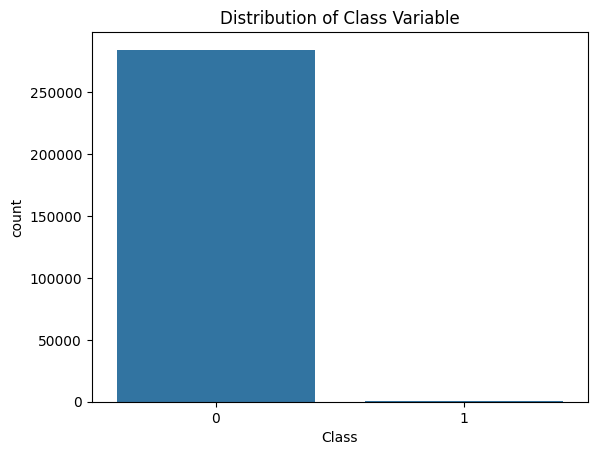

In [6]:
# Visualizing the distribution of the target variable
sns.countplot(x='Class', data=df_anomaly)
plt.title('Distribution of Class Variable')
plt.show()

* `split to train and test` 

In [7]:
# split to features and target
x = df_anomaly.drop(columns=['Class'] , axis=1)
y = df_anomaly['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Pipeline (only scaling is required as features are already PCA transformed)
 
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
x_train_final = num_pipeline.fit_transform(x_train)
x_test_final = num_pipeline.transform(x_test)

* `Calculation of PCA error as a metric`

pca reconstruction error computes the reconstruction error of input samples after dimensionality reduction and reconstruction using Principal Component Analysis (PCA).

In PCA-based anomaly detection, the assumption is that normal data points can be well represented in a lower-dimensional subspace discovered by PCA, while anomalies cannot. The reconstruction error quantifies how much information is lost during this process.

Low error → data point fits well into the PCA subspace → likely normal.

High error → data point does not fit well (large deviation) → potential anomaly.

In [9]:
# function to calculate pca reconstruction error
def anomaly_scores(x_original, x_reconstructed) :
    # normalize the error to make it between 0(normal) and 1(fraud)
    mse = np.sum((x_original - x_reconstructed) ** 2, axis=1)
    loss = (mse - mse.min()) / (mse.max() - mse.min())
    return loss

In [10]:
pca = PCA(n_components=25)  # Reduce to 20 dimensions
x_train_reduced = pca.fit_transform(x_train_final)
x_train_reduced.shape

(199364, 25)

In [11]:
# recover 
x_recovered = pca.inverse_transform(x_train_reduced)

In [12]:
y_scores = anomaly_scores(x_train_final, x_recovered)
y_scores

array([1.01984001e-04, 1.67642898e-04, 1.10792819e-04, ...,
       2.19648383e-04, 6.12585031e-05, 2.77280771e-04], shape=(199364,))

* `Define evaluation metrics`

In [25]:
def evaluate_score(y_true, y_anomaly_scores, return_df=False):
    """
    Plot Precision-Recall curve and ROC curve for anomaly detection evaluation.
    
    Args:
        y_true (array-like): True binary labels (0 = normal, 1 = fraud).
        y_anomaly_scores (array-like): Anomaly scores from the model.
        return_df (bool): If True, return DataFrame with true labels and scores.
        
    Returns:
        pandas.DataFrame (optional): If return_df=True, return df with labels & scores.
    """
    
    # build df
    df = pd.DataFrame({'True Labels': y_true, 'Anomaly Scores': y_anomaly_scores})
    
    # Precision-Recall
    precision, recall, _ = precision_recall_curve(df['True Labels'], df['Anomaly Scores'])
    avg_precision = average_precision_score(df['True Labels'], df['Anomaly Scores'])
    
    plt.figure(figsize=(10, 6))
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
    plt.title(f'Precision-Recall curve (AP = {avg_precision:.2f})', fontsize=14)
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.grid(True)
    plt.show()
    
    # ROC
    fpr, tpr, _ = roc_curve(df['True Labels'], df['Anomaly Scores'])
    auc = roc_auc_score(df['True Labels'], df['Anomaly Scores'])
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='r', linewidth=2, label=f'ROC (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='k', linestyle='--')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()
    
    if return_df:
        return df


* `Define a ScatterPlot Function to plot between the First & Second Component`


In [29]:
## Define a ScatterPlot Fuction

def plot_two_comp(x_reduced, y_true, algo_name):
    ''' This Function tries to plot scatterPlot for First & Second Components using Dimen. Reduction Algorithm
        with diffrent colors according to the true labels (true labels in this project are just for evaluating)
    
    Args:
    *****
        (X_reduced: 2d NumPy array) ---> The reduced features after applying Dimen. Reduction Algorithm
        (y_true: 1D NumPy array) --> The True values (just for evaluating)
        
    Returns:
    ********
        ScatterPlot for the First & Second Vector according to each label
    '''
    ## Plotting the (First Vector & Second Vector) coressponding to each (label)
    df_two_vectors = pd.DataFrame(np.c_[x_reduced[:, [0, 1]], y_true], 
                                  columns=['First Vector', 'Second Vector', 'Label'])

    ## Plotting
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors, fit_reg=False)
    plt.title(f'Using {algo_name}', fontsize=14, c='k')
    plt.show()

* `PCA`

`If you take the number of components is equal to the original number of features in the dataset, almost there is no reconstruction error (capture 100% of variance), and If you take the number of components very low, the reconstruction error will be high (capture less variance), it is hyperparameters it needs to be tuned`

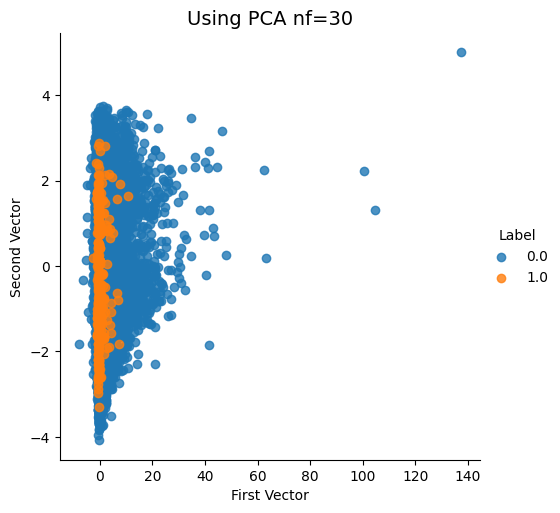

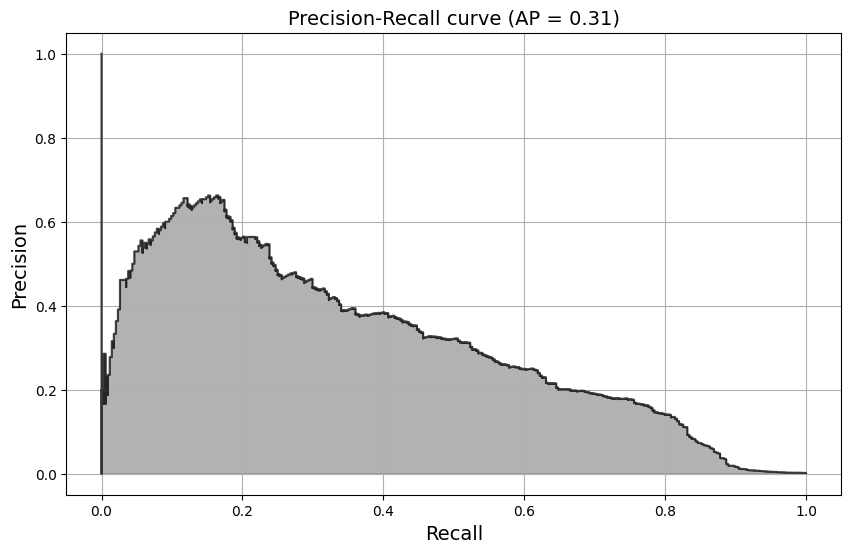

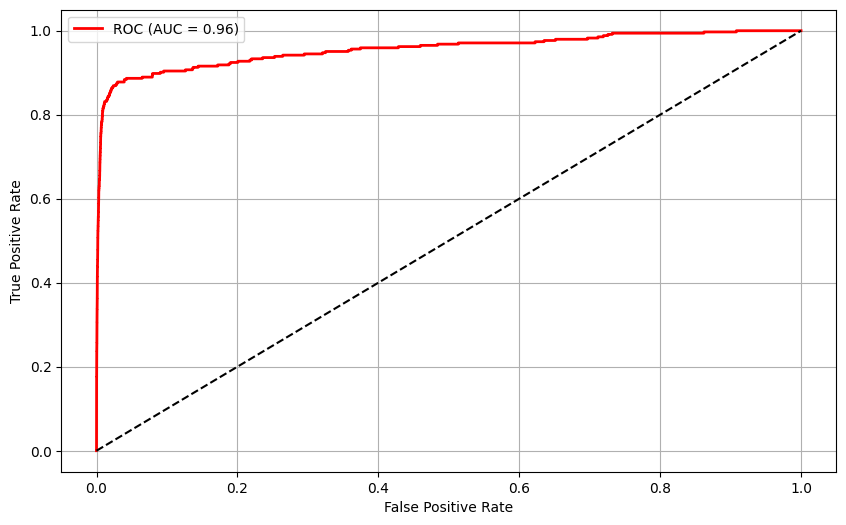

In [ ]:
## Try PCA with 100% Features (30 Features)
pca_30 = PCA(n_components=30, random_state=42)

## Fit and transform for train, transform only for test
x_train_reduced_pca30 = pca_30.fit_transform(x_train_final)

## Inverse (Reconstruct)
x_train_inverse_pca30 = pca_30.inverse_transform(x_train_reduced_pca30)

## Call the ScatterPlot Function
plot_two_comp(x_reduced=x_train_reduced_pca30, y_true=y_train, algo_name='PCA nf=30')

## Getting Anomaly Scores -- call the function
y_scores_pca30 = anomaly_scores(x_original=x_train_final, x_reconstructed=x_train_inverse_pca30)

## Plotting Evaluation plots -- call the function
evaluate_score(y_train,y_scores_pca30)

* > `We need the PCA-based fraud detection solution to have enough error on the rare cases that it can meaningfully separate fraud cases from the normal ones. But the error cannot be so low or so high for all the transactions`

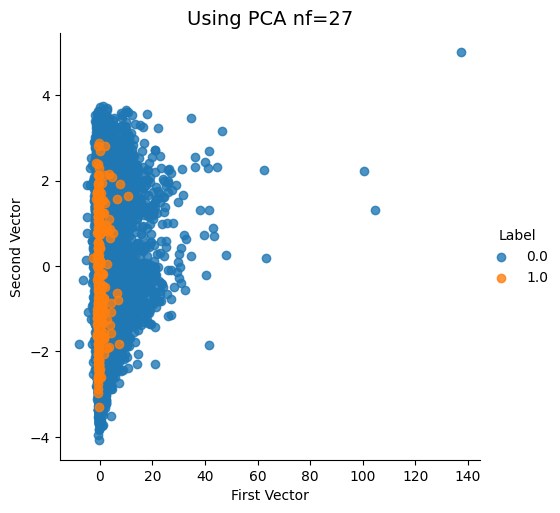

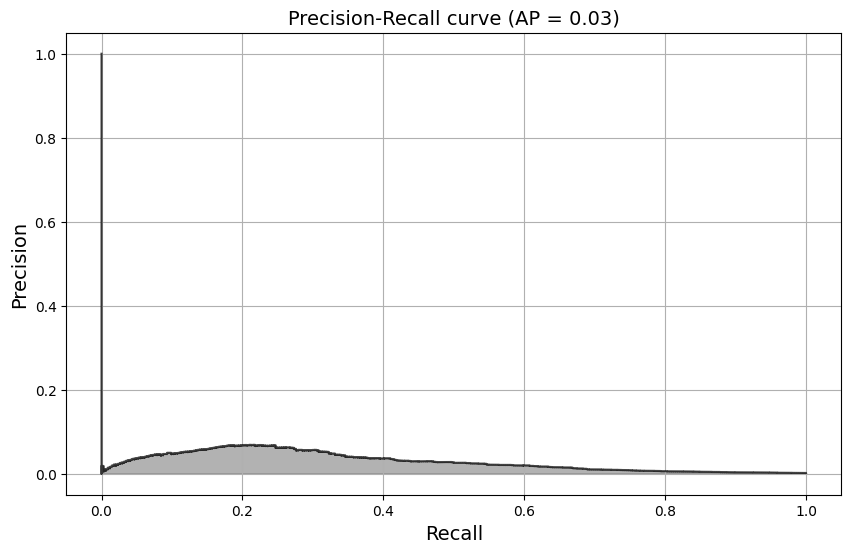

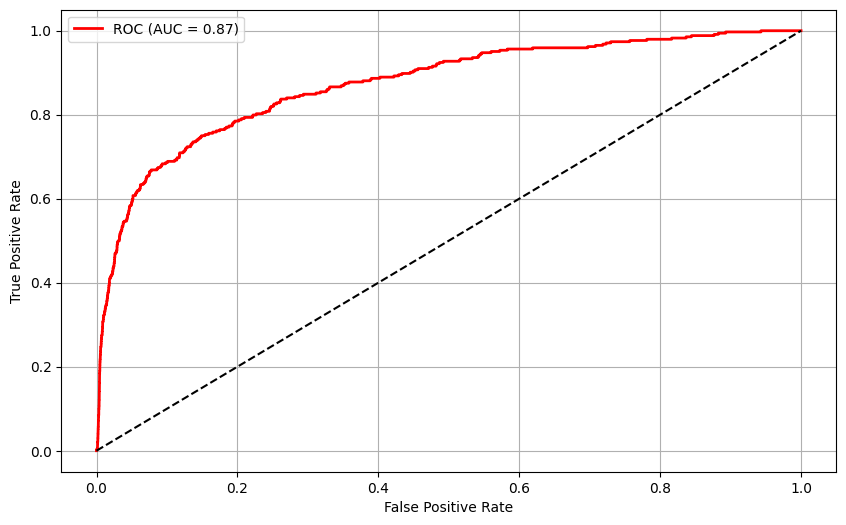

,True Labels,Anomaly Scores
249927,0,0.000064
214082,0,0.000048
106005,0,0.000037
58619,0,0.000576
191638,0,0.000135
...,...,...
3441,0,0.000581
233802,0,0.000017
85418,0,0.000228
29062,0,0.000056


In [34]:
## Try PCA with 27 Features
pca_27 = PCA(n_components=27, random_state=42)  ## The same random_state

## Fit and transform for train, transform only for test
x_train_reduced_pca_27 = pca_27.fit_transform(x_train_final)

## Inverse (Reconstruct)
x_train_inverse_pca_27 = pca_27.inverse_transform(x_train_reduced_pca_27)

## Call the ScatterPlot Function
plot_two_comp(x_reduced=x_train_reduced_pca_27, y_true=y_train, algo_name='PCA nf=27')

## Getting Anomaly Scores -- call the function
y_scores_pca27 = anomaly_scores(x_original=x_train_final, x_reconstructed=x_train_inverse_pca_27)

## Plotting Evaluation plots -- call the function
df_pca27 = evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_pca27, return_df=True)
df_pca27

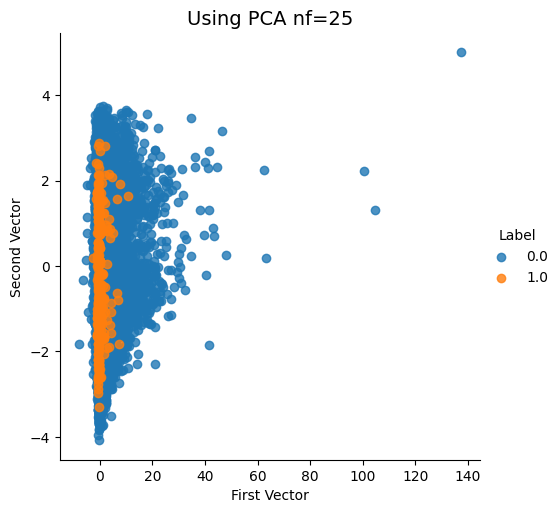

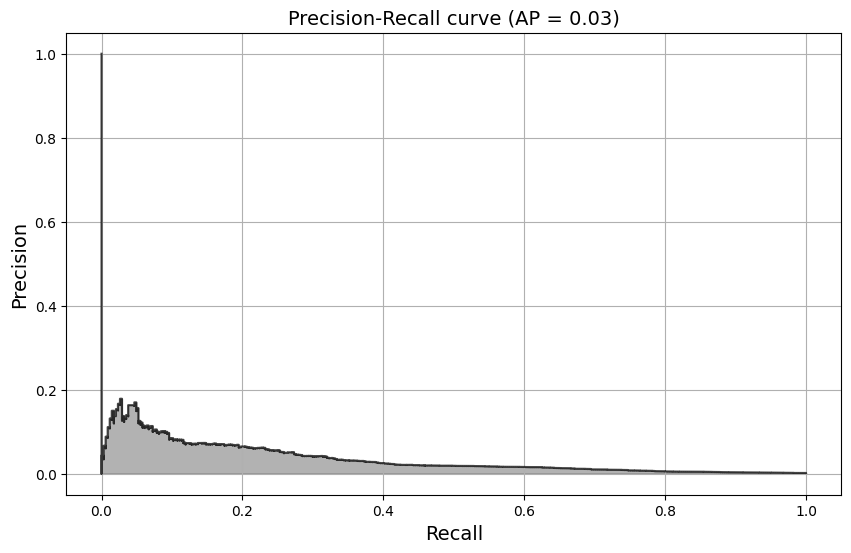

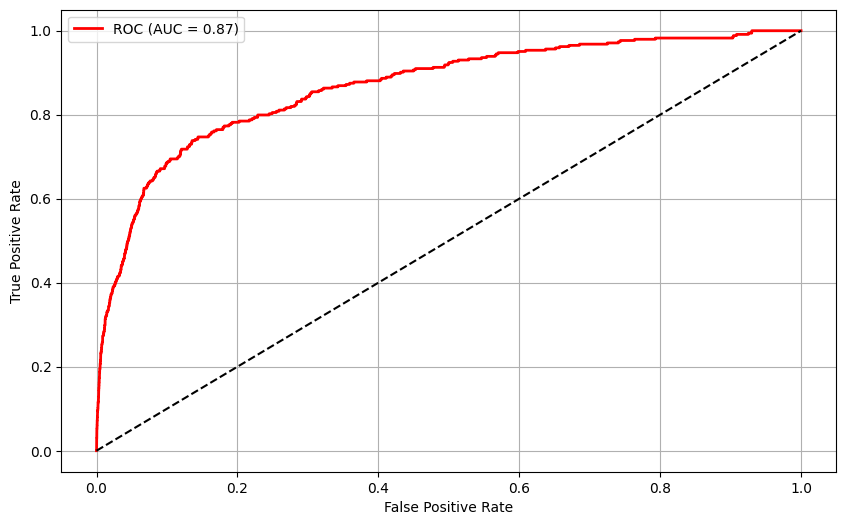

,True Labels,Anomaly Scores
249927,0,0.000102
214082,0,0.000168
106005,0,0.000111
58619,0,0.000513
191638,0,0.000188
...,...,...
3441,0,0.000780
233802,0,0.000022
85418,0,0.000220
29062,0,0.000061


In [36]:
## Try PCA with 25 Features
pca_25 = PCA(n_components=25, random_state=42)  ## The same random_state

## Fit and transform for train, transform only for test
x_train_reduced_pca_25 = pca_25.fit_transform(x_train_final)

## Inverse (Reconstruct)
x_train_inverse_pca_25 = pca_25.inverse_transform(x_train_reduced_pca_25)

## Call the ScatterPlot Function
plot_two_comp(x_reduced=x_train_reduced_pca_25, y_true=y_train, algo_name='PCA nf=25')

## Getting Anomaly Scores -- call the function
y_scores_pca25 = anomaly_scores(x_original=x_train_final, x_reconstructed=x_train_inverse_pca_25)

## Plotting Evaluation plots -- call the functio5
df_pca25 = evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_pca25, return_df=True)
df_pca25

* `after some tuning ,it appears that 30 is the best n_components parameter` 